<a href="https://colab.research.google.com/github/silver919/Data-Science-Projects/blob/main/MNIST_Fashion_Classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion Classification**

## **Import Libraries**

In [1]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import fashion_mnist
print(tf.__version__)

2.8.0


## **Load data**

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [5]:
y_train[0]

9

In [6]:
 class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
 '''
 0 => T-shirt/top
 1 => Trouser
 2 => Pullover
 3 => Dress
 4 => Coat
 5 => Sandal
 6 => Shirt
 7 => Sneaker
 8 => Bag
 9 => Ankle boot  
 '''

'\n0 => T-shirt/top\n1 => Trouser\n2 => Pullover\n3 => Dress\n4 => Coat\n5 => Sandal\n6 => Shirt\n7 => Sneaker\n8 => Bag\n9 => Ankle boot  \n'

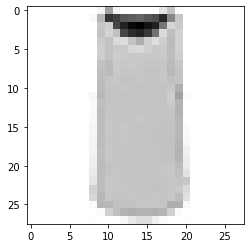

In [7]:
 plt.imshow(X_train[2], cmap="Greys")

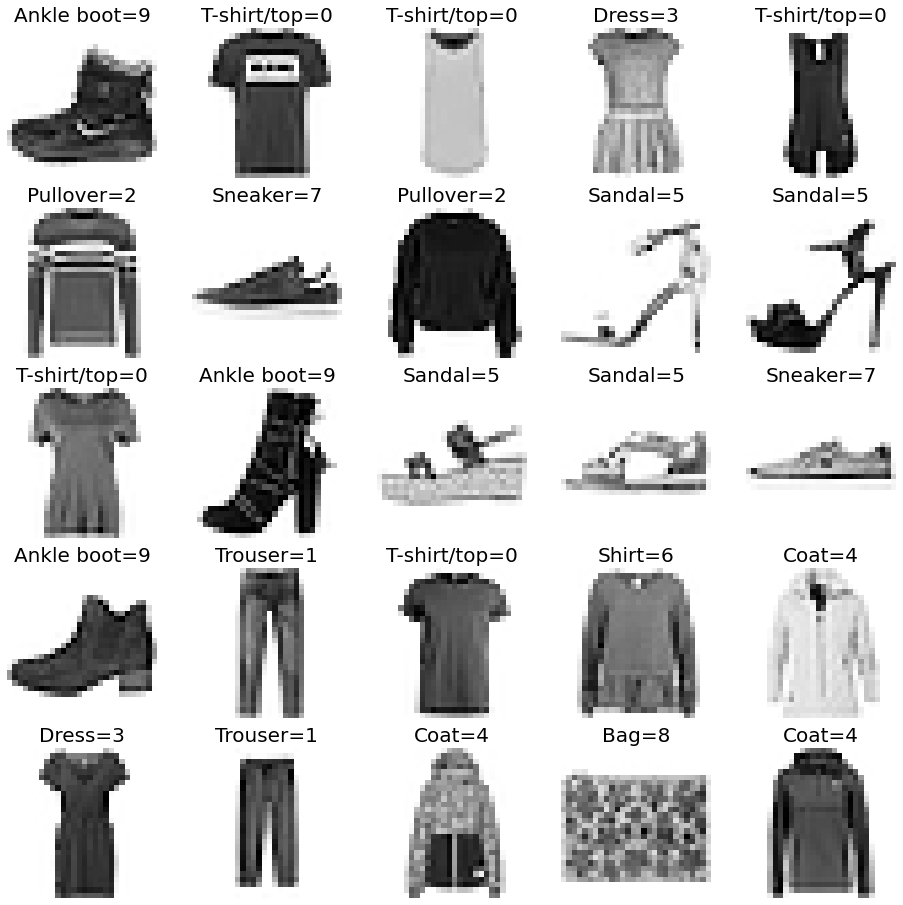

In [8]:
 plt.figure(figsize=(16,16))
 for i in range(25):
   plt.subplot(5,5,i+1)
   plt.imshow(X_train[i],cmap="Greys")
   plt.axis('off')
   plt.title(class_labels[y_train[i]] + "=" + str(y_train[i]), fontsize=20)

##**Feature Scaling**

In [30]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train=X_train/255
X_test=X_test/255

##**Build Neural Network**

In [10]:
model=keras.models.Sequential([
                        keras.layers.Flatten(input_shape=[28,28]),
                        keras.layers.Dense(units=32, activation='relu'),
                        keras.layers.Dense(units=32, activation='relu'),
                        keras.layers.Dense(units=10,activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,epochs=1)

1875/1875 [==============================] - 13s 5ms/step - loss: 0.5706 - accuracy: 0.8012


In [31]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2837 - accuracy: 0.8954
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2779 - accuracy: 0.8969
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2733 - accuracy: 0.8982
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.9009
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2632 - accuracy: 0.9010
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2575 - accuracy: 0.9039
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2559 - accuracy: 0.9049
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2522 - accuracy: 0.9057
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2489 - accuracy: 0.9069
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.244

##**Test and Evaluate Neural Network Model**

In [32]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3806 - accuracy: 0.8748


[0.3806142508983612, 0.8748000264167786]

In [33]:
y_pred = model.predict(X_test)

In [36]:
y_pred[1].round(2)

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
np.argmax(y_pred[1].round(2))

2

In [19]:
y_test[1]

2

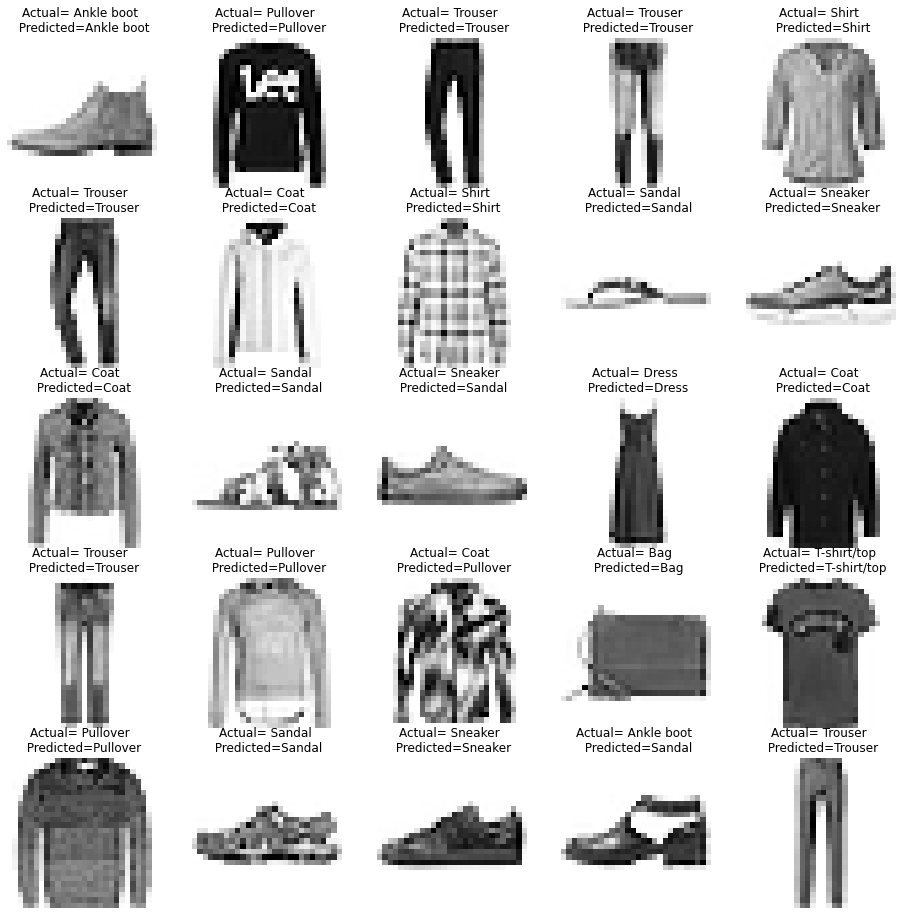

In [20]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i],cmap="Greys")
  plt.axis('off')
  plt.title("Actual= {} \n Predicted={}".format(class_labels[y_test[i]],class_labels[np.argmax(y_pred[i])]))

##**Confusion matrix**

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, [np.argmax(i) for i in y_pred]) 

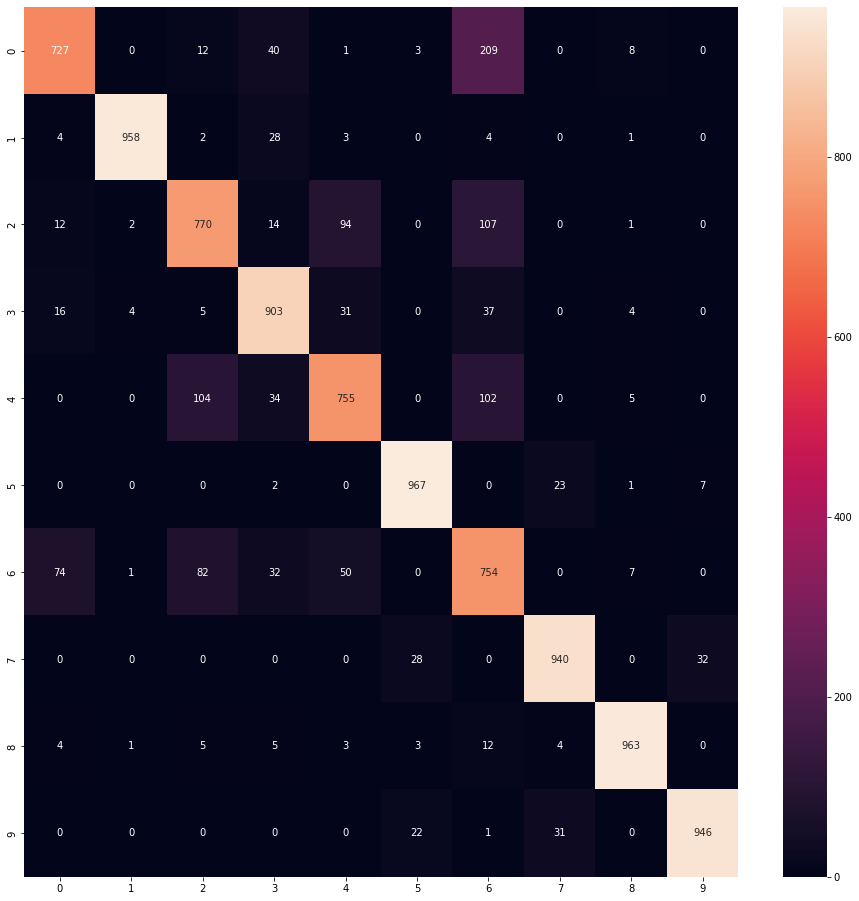

In [22]:
plt.figure(figsize=(16,16))
sns.heatmap(cm,annot=True, fmt="d")

In [23]:
 '''
 0 => T-shirt/top
 1 => Trouser
 2 => Pullover
 3 => Dress
 4 => Coat
 5 => Sandal
 6 => Shirt
 7 => Sneaker
 8 => Bag
 9 => Ankle boot  
 '''


'\n0 => T-shirt/top\n1 => Trouser\n2 => Pullover\n3 => Dress\n4 => Coat\n5 => Sandal\n6 => Shirt\n7 => Sneaker\n8 => Bag\n9 => Ankle boot  \n'

##**Classification Report**

In [24]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, [np.argmax(i) for i in y_pred], target_names=class_labels)

In [25]:
print(cr) 

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.73      0.79      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.79      0.77      0.78      1000
       Dress       0.85      0.90      0.88      1000
        Coat       0.81      0.76      0.78      1000
      Sandal       0.95      0.97      0.96      1000
       Shirt       0.62      0.75      0.68      1000
     Sneaker       0.94      0.94      0.94      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.96      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



##**Save Model**

In [26]:
model.save("MNIST_fashion_classifier_nn_model.h5")

In [27]:
model1 = keras.models.load_model("MNIST_fashion_classifier_nn_model.h5")

In [28]:
model1.predict(X_test)

array([[3.19055084e-06, 1.81404786e-07, 3.31817148e-07, ...,
        1.72418300e-02, 2.26549241e-06, 9.79736865e-01],
       [1.82238318e-06, 8.56522860e-13, 9.99127686e-01, ...,
        3.77466568e-17, 1.59984324e-06, 6.14662428e-16],
       [5.21964967e-06, 9.99982715e-01, 6.92928609e-07, ...,
        1.03653784e-16, 8.43106574e-12, 1.75765557e-17],
       ...,
       [4.32082312e-03, 8.78376056e-07, 1.28024584e-03, ...,
        6.24000129e-10, 9.91281092e-01, 6.57671961e-09],
       [7.83637233e-07, 9.99882579e-01, 3.16146338e-06, ...,
        8.95451047e-10, 2.93625013e-09, 4.55793216e-12],
       [5.09285337e-06, 1.12392243e-07, 1.00283665e-04, ...,
        1.34138321e-03, 6.13300654e-05, 1.87098576e-05]], dtype=float32)